In [154]:
import numpy as np
import pandas as pd

In [155]:
data = pd.read_csv('alzheimer.csv')

In [156]:
data.head()

,Group,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,Nondemented,M,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,Nondemented,M,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,Demented,M,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,Demented,M,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,Demented,M,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [157]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Group   373 non-null    object 
 1   M/F     373 non-null    object 
 2   Age     373 non-null    int64  
 3   EDUC    373 non-null    int64  
 4   SES     354 non-null    float64
 5   MMSE    371 non-null    float64
 6   CDR     373 non-null    float64
 7   eTIV    373 non-null    int64  
 8   nWBV    373 non-null    float64
 9   ASF     373 non-null    float64
dtypes: float64(5), int64(3), object(2)
memory usage: 29.3+ KB


In [158]:
data.describe()

,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,373.000000,373.000000,354.000000,371.000000,373.000000,373.000000,373.000000,373.000000
mean,77.013405,14.597855,2.460452,27.342318,0.290885,1488.128686,0.729568,1.195461
std,7.640957,2.876339,1.134005,3.683244,0.374557,176.139286,0.037135,0.138092
min,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,71.000000,12.000000,2.000000,27.000000,0.000000,1357.000000,0.700000,1.099000
50%,77.000000,15.000000,2.000000,29.000000,0.000000,1470.000000,0.729000,1.194000
75%,82.000000,16.000000,3.000000,30.000000,0.500000,1597.000000,0.756000,1.293000
max,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


In [159]:
data.isnull().sum()

Group     0
M/F       0
Age       0
EDUC      0
SES      19
MMSE      2
CDR       0
eTIV      0
nWBV      0
ASF       0
dtype: int64

In [160]:
data['SES'].fillna(data['SES'].mean(), inplace=True)
data['MMSE'].fillna(data['MMSE'].mean(), inplace=True)

data.head()

,Group,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,Nondemented,M,87,14,2.000000,27.0,0.0,1987,0.696,0.883
1,Nondemented,M,88,14,2.000000,30.0,0.0,2004,0.681,0.876
2,Demented,M,75,12,2.460452,23.0,0.5,1678,0.736,1.046
3,Demented,M,76,12,2.460452,28.0,0.5,1738,0.713,1.010
4,Demented,M,80,12,2.460452,22.0,0.5,1698,0.701,1.034


Text(0.5, 1.0, 'Yaş-Eğitim Dağılımı')

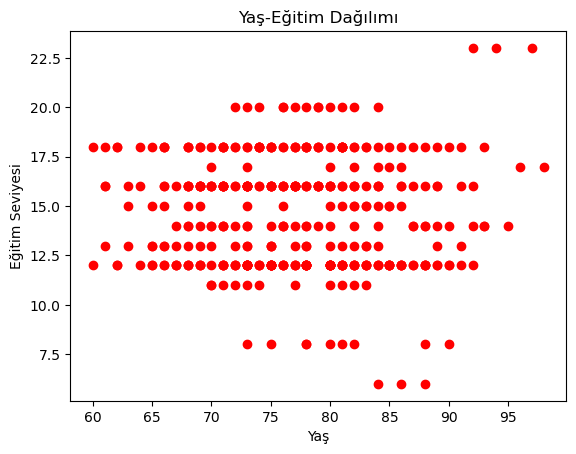

In [161]:
import matplotlib.pyplot as plt

plt.scatter(data['Age'], data['EDUC'], color='red', marker='o')
plt.xlabel('Yaş')
plt.ylabel('Eğitim Seviyesi')
plt.title('Yaş-Eğitim Dağılımı')

In [162]:
data['Group'] = data['Group'].map({'Nondemented': 0, 'Converted': 1, 'Demented': 2})

In [163]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

label_encoder = LabelEncoder()
data['M/F'] = label_encoder.fit_transform(data['M/F'])

Text(0, 0.5, 'Sayı')

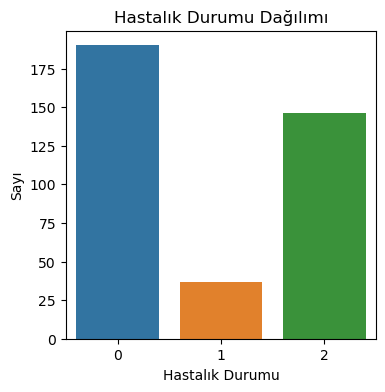

In [164]:
import seaborn as sns

plt.figure(figsize=(4,4))
sns.countplot(data=data, x='Group')
plt.title('Hastalık Durumu Dağılımı')
plt.xlabel('Hastalık Durumu')
plt.ylabel('Sayı')

Text(0, 0.5, 'Sayı')

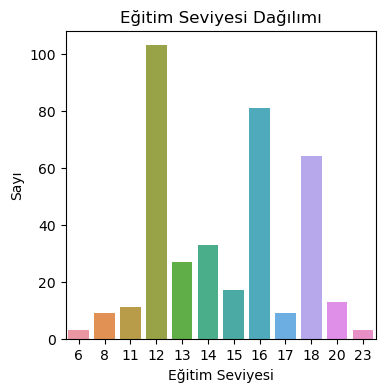

In [165]:
plt.figure(figsize=(4,4))
sns.countplot(data=data, x='EDUC')
plt.title('Eğitim Seviyesi Dağılımı')
plt.xlabel('Eğitim Seviyesi')
plt.ylabel('Sayı')

Text(0.5, 1.0, 'Cinsiyet Dağılımı')

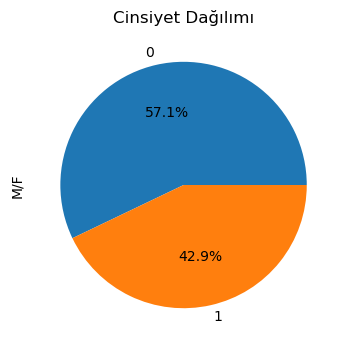

In [166]:
plt.figure(figsize=(4,4))
data['M/F'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Cinsiyet Dağılımı')

Text(0, 0.5, 'Frekans')

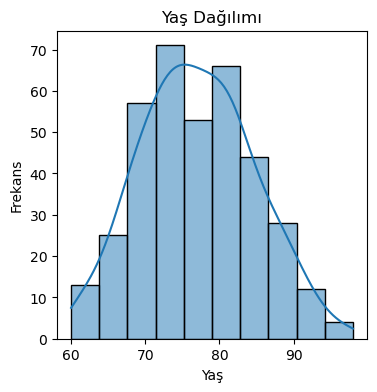

In [167]:
plt.figure(figsize=(4,4))
sns.histplot(data=data, x='Age', bins=10, kde=True)
plt.title('Yaş Dağılımı')
plt.xlabel('Yaş')
plt.ylabel('Frekans')

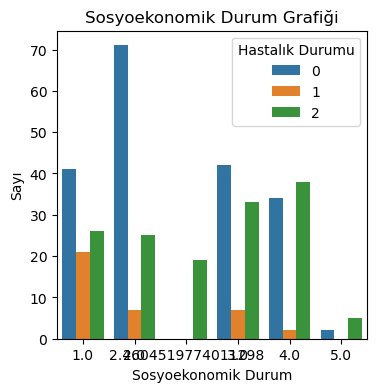

In [168]:
plt.figure(figsize=(4,4))
sns.countplot(data=data, x='SES', hue='Group')
plt.title('Sosyoekonomik Durum Grafiği')
plt.xlabel('Sosyoekonomik Durum')
plt.ylabel('Sayı')
plt.legend(title='Hastalık Durumu')

Text(0, 0.5, 'MMSE Skoru')

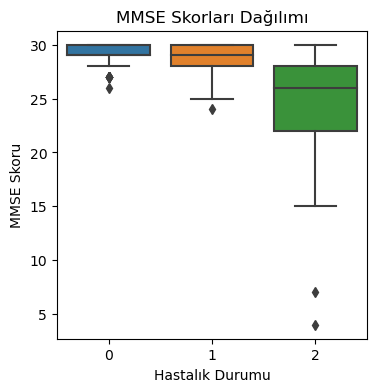

In [169]:
plt.figure(figsize=(4,4))
sns.boxplot(data=data, x='Group', y='MMSE')
plt.title('MMSE Skorları Dağılımı')
plt.xlabel('Hastalık Durumu')
plt.ylabel('MMSE Skoru')

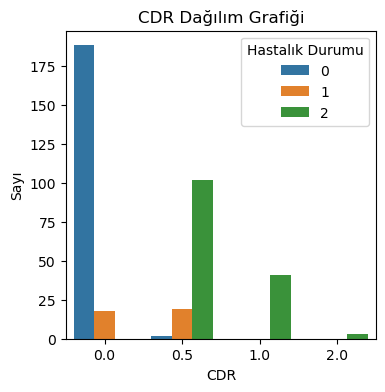

In [170]:
plt.figure(figsize=(4,4))
sns.countplot(data=data, x='CDR', hue='Group')
plt.title('CDR Dağılım Grafiği')
plt.xlabel('CDR')
plt.ylabel('Sayı')
plt.legend(title='Hastalık Durumu')

Text(0, 0.5, 'eTIV')

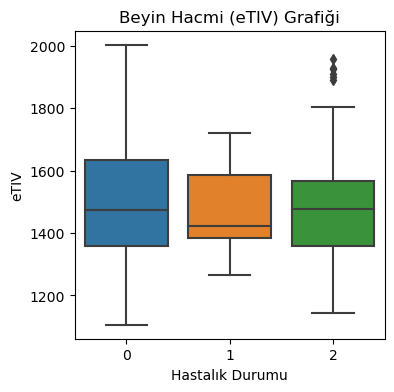

In [171]:
plt.figure(figsize=(4,4))
sns.boxplot(data=data, x='Group', y='eTIV')
plt.title('Beyin Hacmi (eTIV) Grafiği')
plt.xlabel('Hastalık Durumu')
plt.ylabel('eTIV')

Text(0, 0.5, 'Yaş')

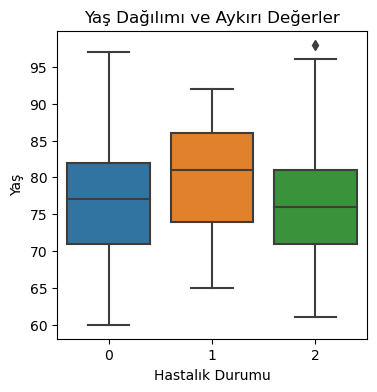

In [172]:
plt.figure(figsize=(4,4))
sns.boxplot(data=data, x='Group', y='Age')
plt.title('Yaş Dağılımı ve Aykırı Değerler')
plt.xlabel('Hastalık Durumu')
plt.ylabel('Yaş')

Text(0.5, 1.0, 'Korelasyon Matrisi')

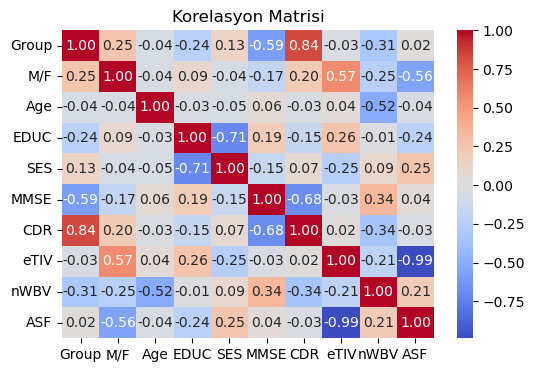

In [173]:
plt.figure(figsize=(6,4))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korelasyon Matrisi')

In [174]:
x = data.drop('Group', axis=1)
y = data['Group']

In [175]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=0)

In [176]:
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [177]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [178]:
model = Sequential()

model.add(Dense(64, activation = "relu",input_shape=(x_train.shape[1],)))
model.add(Dense(32, activation = "relu"))
model.add(Dense(8 ,activation  = "relu"))

model.add(Dense(1))

model.compile(optimizer = "adam",loss ="mse", metrics=['mae'])

In [ ]:
model.fit(x = x_train, y =y_train, epochs = 300,validation_data = (x_test,y_test),batch_size=32)

Epoch 1/300
8/8 [==============================] - 1s 15ms/step - loss: 1.1554 - mae: 0.8954 - val_loss: 0.9136 - val_mae: 0.8077
Epoch 2/300
8/8 [==============================] - 0s 5ms/step - loss: 0.8295 - mae: 0.7728 - val_loss: 0.6868 - val_mae: 0.7248
Epoch 3/300
8/8 [==============================] - 0s 4ms/step - loss: 0.5886 - mae: 0.6503 - val_loss: 0.5603 - val_mae: 0.6360
Epoch 4/300
8/8 [==============================] - 0s 4ms/step - loss: 0.4727 - mae: 0.5634 - val_loss: 0.5056 - val_mae: 0.5737
Epoch 5/300
8/8 [==============================] - 0s 5ms/step - loss: 0.3996 - mae: 0.4923 - val_loss: 0.4703 - val_mae: 0.5398
Epoch 6/300
8/8 [==============================] - 0s 4ms/step - loss: 0.3543 - mae: 0.4499 - val_loss: 0.4170 - val_mae: 0.5080
Epoch 7/300
8/8 [==============================] - 0s 4ms/step - loss: 0.3109 - mae: 0.4191 - val_loss: 0.3813 - val_mae: 0.4883
Epoch 8/300
8/8 [==============================] - 0s 4ms/step - loss: 0.2734 - mae: 0.4018 - va

In [ ]:
loss, mae = model.evaluate(x_test, y_test)
print(f'Test loss: {loss}, Test MAE: {mae}')